
# Project: Relationship Between CO2 Emission and GDP

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

CO2 emission of a country or an economy is thought to be linked closely to gross domestic product (GDP) according to various sources. What is unknown however, is how exactly the correlation between the two develops over the course of the development of that economy.

One hypothesis is, that during the development of an economy, the environmental damage follows an inverted U-shape, when drawn versus GDP per capita (i.e. per person). This curve is also known as the [Environmental Kuznets Curve](https://en.wikipedia.org/wiki/Kuznets_curve#Environmental_Kuznets_curve). Economist Simon Kuznets hypothesized in the 50s and 60s, that market forces first increase and later decrease econimic inequality, when an economy develops. This concept was later applied to environmental damage and found valid e.g. for sulfur dioxide.
![EKC](./data/Environmental_Kuznets_Curve.png)

**Source:**[Wikipedia: Kuznets Curve](https://en.wikipedia.org/wiki/Kuznets_curve)

The research question that shall be answered during the course of this study is:

**Does the CO2 emission per capita versus GDP per capita follow the Environmental Kuznets Curve?**

In order to answer this question, the following steps have been undertaken:
1. determine the development of CO2 emissions per capita and GDP per capita over time for groups of countries, representing highly developed, medium developed and less developed economies
2. determine the correlation of CO2 emission per capita and GDP per capita seperately for these groups of economies
3. determine CO2 intensity for groups of economies
4. determine outliers and speculate on possible causes

**Note:** Countries will be counted as highly developed, when their HDI is above or equal to 0.8 (very high HDI acc. to UN). Below an HDI of 0.8, but above 0.5, countries are counted as medium for the purpose of this exercise (high/medium HDI acc. to UN) and below 0.5, countries are considered having a low HDI.

**Source:** [Wikipedia: Human Development Index](https://en.wikipedia.org/wiki/Human_Development_Index)

In [1]:
# in this cell, all packages used throughout this study are imported

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, the data sets to be used are loaded in data frames and a first exploration is done using pandas. The data is cleaned and joint data sets are created in order to ease the visualization later on.

The data sets used in this study are the following:

- `indicator CDIAC carbon_dioxide_emissions_per_capita.csv` - Average CO2 emission in metric tons per person during the given year, calculated from deviding the total CO2 with the total population of the countries.
- `GDPpercapitaconstant2000US.csv` - Gross Domestic Product per capita in constant 2000 US$. The inflation but not the differences in the cost of living between countries has been taken into account.
- `Indicator_HDI.csv` - Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.

**Data Source:** [www.gapminder.org](https://www.gapminder.org/)

**Note:** The data format of the gapminder data sets was ".xls". All data sets were saved as ".csv" using "," as delimiter and "." as decimal point. Only the first sheet of each workbook was used.

### General Properties

In [2]:
# load all data sets using pandas read_csv method
path = './data/'
co2_per_person = pd.read_csv(path + 'indicator CDIAC carbon_dioxide_emissions_per_capita.csv')
gdp_per_person = pd.read_csv(path + 'GDPpercapitaconstant2000US.csv')
hdi = pd.read_csv(path + 'Indicator_HDI.csv')

### Load data, add indexes and drop NaNs
Data cleaning steps in this section include resetting of the indices, removal of rows and columns containing too many NaNs and reorganising the datasets, so they can be used for further analysis and visualization.

#### Dependant Variable - CO2 per Capita

In [3]:
# clean dependant variable data set containing CO2 emissions per capita for a number of countries worldwide 
# for the years 1751 through 2012
co2_per_person = co2_per_person.set_index('CO2 per capita')

# drop all rows and columns containing only nulls
co2_per_person = co2_per_person.dropna(axis=1, how='all')
co2_per_person = co2_per_person.dropna(axis=0, how='all')

# retrieval of some statistical values about the data set in order to get a feeling for the distribution of the data
co2_per_person.describe()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,200.000000,200.000000,200.000000,200.000000,201.000000,201.000000,201.000000,201.000000,65.000000,65.000000
mean,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,5.160597,5.266567,5.242741,5.250673,5.387444,5.293425,5.064836,5.189779,8.395975,8.391032
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.892710,7.222377,7.198735,6.950140,7.281876,6.858804,6.479270,6.538857,7.796528,8.041490
min,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.022704,0.027472,0.021237,0.025019,0.003482,0.008618,0.011942,0.008443,0.401268,0.426003
25%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.610230,0.682390,0.730938,0.681245,0.645242,0.613104,0.609647,0.640119,4.196912,4.141014
50%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,3.216404,3.242589,3.302545,3.301199,3.164370,3.277726,3.106366,3.263605,6.722385,6.506759
75%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,7.514300,7.530032,7.296806,7.463160,7.555909,7.293089,6.782996,6.983513,9.513115,9.194220
max,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,55.322622,62.069377,63.187436,57.986895,57.066817,48.702062,41.378843,40.098333,41.220928,46.643197


A lot of columns contain only one or very few values. Therefore no statistical conclusions can be drawn from these columns. The data set will therefore be limited to years, where there are values for at least 30 countries to be able to draw statistical conclusions.

In [4]:
# removal of columns, containing less than 30 values
for year in co2_per_person:
    if len(co2_per_person[year].dropna()) < 30:
        co2_per_person = co2_per_person.drop([year], axis=1)

# show some countries, without nulls
co2_per_person.dropna(how='any').head()

,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
CO2 per capita,,,,,,,,,,,,,,,,,,,,,
Argentina,0.353407,0.281116,0.536920,0.406201,0.269032,0.384371,0.417177,0.517903,0.569290,0.560649,...,3.502902,4.072844,4.160611,4.464492,4.582394,4.785170,4.483564,4.466338,4.676320,4.774982
Australia,1.070899,1.204297,1.134458,1.142367,1.255111,1.268886,1.189962,1.285223,1.327842,1.279118,...,17.461840,17.346237,17.773976,17.893128,17.859906,18.016313,18.037269,16.752301,16.772660,16.182094
Austria,2.333080,2.255453,2.409250,2.418613,2.746297,2.630087,3.184193,3.227084,3.589202,3.713946,...,8.889629,8.778800,9.017238,8.649446,8.319712,8.183160,7.438353,7.969244,7.606392,7.095971
Belgium,5.701722,6.006326,6.091720,6.537566,6.133517,6.059327,5.730476,6.257509,6.237149,6.515194,...,11.144728,10.743691,10.419898,10.198066,9.792963,9.797337,9.772561,10.169529,9.513115,9.194220
Bulgaria,0.003333,0.005477,0.007558,0.009579,0.011534,0.013429,0.017301,0.022058,0.022718,0.028220,...,6.033541,6.006152,6.189984,6.364376,6.911699,6.690139,5.674513,5.961127,6.722385,6.153028


In [5]:
co2_per_person.describe()

,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,30.000000,31.000000,31.000000,31.000000,32.000000,34.000000,34.000000,34.000000,35.000000,36.000000,...,200.000000,200.000000,200.000000,200.000000,201.000000,201.000000,201.000000,201.000000,65.000000,65.000000
mean,1.537461,1.610143,1.625040,1.704654,1.718057,1.603940,1.584984,1.665314,1.671426,1.688964,...,5.160597,5.266567,5.242741,5.250673,5.387444,5.293425,5.064836,5.189779,8.395975,8.391032
std,2.141261,2.261745,2.246633,2.361355,2.364348,2.285767,2.146850,2.266749,2.295473,2.325665,...,6.892710,7.222377,7.198735,6.950140,7.281876,6.858804,6.479270,6.538857,7.796528,8.041490
min,0.002275,0.000835,0.000106,0.000412,0.000615,0.004956,0.011133,0.011765,0.011694,0.001352,...,0.022704,0.027472,0.021237,0.025019,0.003482,0.008618,0.011942,0.008443,0.401268,0.426003
25%,0.143764,0.096678,0.113459,0.128559,0.103360,0.085790,0.086896,0.090226,0.097714,0.097688,...,0.610230,0.682390,0.730938,0.681245,0.645242,0.613104,0.609647,0.640119,4.196912,4.141014
50%,0.791935,0.787413,0.865533,0.975376,0.966271,0.660096,0.668812,0.764207,0.785331,0.771009,...,3.216404,3.242589,3.302545,3.301199,3.164370,3.277726,3.106366,3.263605,6.722385,6.506759
75%,2.122706,2.213857,2.272085,2.344073,2.489058,2.382383,2.354273,2.395915,2.316141,2.418118,...,7.514300,7.530032,7.296806,7.463160,7.555909,7.293089,6.782996,6.983513,9.513115,9.194220
max,9.675786,9.962969,10.217292,10.351613,10.464545,10.140584,8.986737,10.180592,10.168220,10.345995,...,55.322622,62.069377,63.187436,57.986895,57.066817,48.702062,41.378843,40.098333,41.220928,46.643197


#### Resulting Data Set for CO2 per capita
The resulting data set contains CO2 emission data for at least 30 countries for years starting in 1887. Although [industrialization](https://en.wikipedia.org/wiki/Industrialisation) is generally considered to have started around 1800, this seems like a good compromise between capturing all relevant times and having a big enough sample for data analysis.

#### Independant Variable - GDP per Capita

In [6]:
# clean independant variable data set containing GDP per capita for a number of countries worldwide 
# for the years 1960 through 2011

gdp_per_person = gdp_per_person.set_index('Income per person (fixed 2000 US$)')

# drop all rows and columns containing only nulls
gdp_per_person = gdp_per_person.dropna(axis=1, how='all')
gdp_per_person = gdp_per_person.dropna(axis=0, how='all')

gdp_per_person.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,96.000000,97.000000,97.000000,97.000000,97.000000,103.000000,105.000000,106.000000,107.000000,107.000000,...,195.000000,195.000000,194.000000,194.000000,193.000000,193.000000,191.000000,189.000000,182.000000,175.000000
mean,2862.692195,2936.271369,3033.697747,3127.397267,3297.171464,3479.098233,3561.800465,3643.836068,3827.447920,4014.630287,...,7983.084448,8113.092660,8335.349531,8545.104221,8898.582041,9219.106697,8999.106190,8463.079022,7699.995854,7603.241430
std,3966.169477,4078.453837,4209.541510,4322.069499,4603.806933,4686.086119,4885.065723,5088.097077,5226.637333,5462.190047,...,12730.751887,12804.769377,13171.168298,13440.153560,14003.742573,14664.833399,14702.224566,14079.334478,11280.297479,10906.851828
min,98.634845,77.662309,72.324927,77.867365,88.130052,100.137524,107.805084,99.080123,92.569121,105.288508,...,83.081859,85.282625,88.243053,92.367256,94.769735,97.910183,101.103851,101.169007,105.531738,109.809298
25%,348.092860,367.165347,347.301046,362.828560,371.591692,391.167669,420.366839,409.926541,427.755618,443.355777,...,606.407609,605.896769,629.447328,628.411890,640.762816,673.004691,686.624839,705.007574,676.924076,650.652354
50%,962.840433,963.113762,976.188701,1045.780232,1064.991250,1091.500026,1111.158861,1150.518306,1238.791051,1261.364518,...,2040.248192,2129.193396,2206.522493,2284.186698,2404.736431,2494.352654,2510.278480,2527.938377,2459.478865,2522.824763
75%,3475.484109,3744.356202,3961.399895,4071.375675,4238.361138,5029.630414,5114.437182,5257.801228,5612.126561,6066.936702,...,9537.855880,9415.266271,9414.557553,9655.998281,10264.674284,10714.744222,10447.748978,9294.355996,9019.537452,9077.125442
max,19588.612697,20009.625798,20410.612688,20153.284926,21842.810221,22334.443485,25091.732053,27876.079659,27925.907805,28350.643198,...,77348.898742,78229.939808,80255.753889,81827.956121,85942.671127,98397.089855,108111.212788,105147.437697,63036.360611,52056.017811


In [7]:
# show an extract of the data containing only countries without nulls        
gdp_per_person.dropna(how='any').head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Income per person (fixed 2000 US$),,,,,,,,,,,,,,,,,,,,,
Algeria,1280.384828,1085.414612,855.947986,1128.415780,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482
Argentina,5251.876754,5448.303627,5316.578969,4956.216522,5375.463707,5855.611563,5733.311946,5833.052305,6028.124335,6515.364261,...,6428.393836,6933.155594,7492.249508,8107.975365,8717.176296,9388.688523,9935.834246,9933.229024,10749.319224,11601.630223
Australia,9407.685082,9451.546304,9351.023272,9749.128563,10231.144465,10633.094400,10635.677912,11165.706459,11533.028316,12091.755332,...,22402.991019,22825.571022,23498.261991,23929.164397,24295.081380,24765.548902,25190.720626,25007.697756,25190.839860,25306.824938
Austria,7434.183717,7802.972546,7960.707270,8237.060529,8683.454516,8927.460698,9365.306134,9575.183558,9951.607180,10539.697000,...,24375.113835,24466.706298,24945.047766,25370.465866,26171.690912,27036.487332,27305.923295,26183.997598,26642.993858,27266.403350
Bahamas,11926.460965,12558.295808,13186.104057,13858.516886,14584.427751,15374.335827,16045.527598,16866.146998,17592.545598,18516.803145,...,21809.347175,21228.075689,21106.720080,21507.715258,21728.708882,21721.618410,20911.599431,19619.121361,19395.152312,19466.990524


#### Resulting Data Set for GDP per Capita

Data is available for a considerable number of countries between 1960 and 2011. In 1960, the number of countries with just minimal economic development was still high and can therefore be used for the purpose of this study.

#### Independant Variable - Human Development Index

In [8]:
# clean the hdi data set; this data set will be used in order to differentiate between the correlation of CO2 emission 
# and the independant variables in more developed countries and in less developed countries

# reindex the data set
hdi = hdi.set_index('HDI')

# drop rows and columns that contain no valid data
hdi = hdi.dropna(axis=1, how='all')
hdi = hdi.dropna(axis=0, how='all')

hdi.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
HDI,,,,,,,,,
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.838
Angola,NaN,NaN,0.384,0.445,0.459,0.471,0.476,0.481,0.486


The data frame above contains the human development index (HDI) of various countries as it develops over time. For the rest of the study, only the HDI valid in 2011 is used in order to ease the analysis. The HDI in 2011 is the last one available for many countries.

### Create Specific Data Sets for Visualization
In the following cells, a number of data sets are created in order to prepare the data for visualization. The variables are grouped into clusters of low, medium and high HDI.

In [9]:
# create data sets with new HDI 2009 column. 2009 is used, because data is available 
# for almost all countries and data sets for this year.
co2_per_person = co2_per_person.join(hdi['2009'],how='inner',lsuffix='',rsuffix='_hdi')
gdp_per_person = gdp_per_person.join(hdi['2009'],how='inner',lsuffix='',rsuffix='_hdi')
gdp_per_person.dropna(how='any').head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2009_hdi
Algeria,1280.384828,1085.414612,855.947986,1128.415780,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482,0.691
Argentina,5251.876754,5448.303627,5316.578969,4956.216522,5375.463707,5855.611563,5733.311946,5833.052305,6028.124335,6515.364261,...,6933.155594,7492.249508,8107.975365,8717.176296,9388.688523,9935.834246,9933.229024,10749.319224,11601.630223,0.788
Australia,9407.685082,9451.546304,9351.023272,9749.128563,10231.144465,10633.094400,10635.677912,11165.706459,11533.028316,12091.755332,...,22825.571022,23498.261991,23929.164397,24295.081380,24765.548902,25190.720626,25007.697756,25190.839860,25306.824938,0.926
Austria,7434.183717,7802.972546,7960.707270,8237.060529,8683.454516,8927.460698,9365.306134,9575.183558,9951.607180,10539.697000,...,24466.706298,24945.047766,25370.465866,26171.690912,27036.487332,27305.923295,26183.997598,26642.993858,27266.403350,0.879
Bahamas,11926.460965,12558.295808,13186.104057,13858.516886,14584.427751,15374.335827,16045.527598,16866.146998,17592.545598,18516.803145,...,21228.075689,21106.720080,21507.715258,21728.708882,21721.618410,20911.599431,19619.121361,19395.152312,19466.990524,0.769


The following data set contains CO2 emission per capita, GDP per capita and CO2 intensity (CO2 emission/GDP) for each country for the year 2009 (country as index). The year 2009 is chosen, because the needed values are available for most countries for this year. The data is grouped according to HDI.

In [10]:
# take the country data for 2009
country_data = pd.DataFrame()

country_data['CO2 per Capita'] = co2_per_person['2009']
country_data['GDP per Capita'] = gdp_per_person['2009']
country_data['CO2 Intensity'] = co2_per_person['2009']/gdp_per_person['2009']
country_data['CO2 per Capita - HDI Low'] = co2_per_person[co2_per_person['2009_hdi']<0.5]['2009']
country_data['GDP per Capita - HDI Low'] = gdp_per_person[gdp_per_person['2009_hdi']<0.5]['2009']
#country_data['CO2 Intensity - HDI Low'] = co2_per_person[co2_per_person['2009_hdi']<0.5]['2009']/gdp_per_person[gdp_per_person['2009_hdi']<0.5]['2009']
country_data['CO2 per Capita - HDI Medium'] = co2_per_person[(co2_per_person['2009_hdi']>=0.5)&(co2_per_person['2009_hdi']<=0.8)]['2009']
country_data['GDP per Capita - HDI Medium'] = gdp_per_person[(gdp_per_person['2009_hdi']>=0.5)&(gdp_per_person['2009_hdi']<=0.8)]['2009']
#country_data['CO2 Intensity - HDI Medium'] = co2_per_person[(co2_per_person['2009_hdi']>=0.5)&(co2_per_person['2009_hdi']<=0.8)]['2009']/gdp_per_person[(gdp_per_person['2009_hdi']>=0.5)&(gdp_per_person['2009_hdi']<=0.8)]['2009']
country_data['CO2 per Capita - HDI High'] = co2_per_person[co2_per_person['2009_hdi']>0.8]['2009']
country_data['GDP per Capita - HDI High'] = gdp_per_person[gdp_per_person['2009_hdi']>0.8]['2009']
#country_data['CO2 Intensity - HDI High'] = co2_per_person[co2_per_person['2009_hdi']>0.8]['2009']/gdp_per_person[gdp_per_person['2009_hdi']>0.8]['2009']


# drop rows and columns that contain no valid data
country_data = country_data.dropna(axis=1, how='all')
country_data = country_data.dropna(axis=0, how='all')

country_data.head()

,CO2 per Capita,GDP per Capita,CO2 Intensity,CO2 per Capita - HDI Low,GDP per Capita - HDI Low,CO2 per Capita - HDI Medium,GDP per Capita - HDI Medium,CO2 per Capita - HDI High,GDP per Capita - HDI High
Afghanistan,0.213325,NaN,NaN,0.213325,NaN,NaN,NaN,NaN,NaN
Albania,1.215055,1857.352947,0.000654,NaN,NaN,1.215055,1857.352947,NaN,NaN
Algeria,3.564361,2192.703976,0.001626,NaN,NaN,3.564361,2192.703976,NaN,NaN
Andorra,6.178520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,1.500054,619.818580,0.002420,1.500054,619.81858,NaN,NaN,NaN,NaN


The following data set contains mean values of CO2 emission per capita, GDP per capita and CO2 intensity (CO2 emission/GDP) for each each year between 1960 and 2009 (year as index). The data is grouped according to HDI. Separate columns for the United Kingdom are created, because we have values for all the years for the UNited Kingdom in the data set.

In [11]:
# transpose and limit to years 1960-2009, where a significant number of values is available
# take the mean across all countrys in that hdi range for each year
time_data = pd.DataFrame()
time_data['CO2 per Capita'] = co2_per_person.transpose().mean(axis=1)['1960':'2009']
time_data['GDP per Capita'] = gdp_per_person.transpose().mean(axis=1)['1960':'2009']
time_data['CO2 Intensity'] = (co2_per_person/gdp_per_person).transpose().mean(axis=1)['1960':'2009']
time_data['CO2 per Capita - HDI Low'] = co2_per_person[co2_per_person['2009_hdi']<0.5].transpose().mean(axis=1)['1960':'2009']
time_data['GDP per Capita - HDI Low'] = gdp_per_person[gdp_per_person['2009_hdi']<0.5].transpose().mean(axis=1)['1960':'2009']
time_data['CO2 Intensity - HDI Low'] = (co2_per_person[co2_per_person['2009_hdi']<0.5]/gdp_per_person[gdp_per_person['2009_hdi']<0.5]).transpose().mean(axis=1)['1960':'2009']
time_data['CO2 per Capita - HDI Medium'] = co2_per_person[(co2_per_person['2009_hdi']>=0.5)&(co2_per_person['2009_hdi']<=0.8)].transpose().mean(axis=1)['1960':'2009']
time_data['GDP per Capita - HDI Medium'] = gdp_per_person[(gdp_per_person['2009_hdi']>=0.5)&(gdp_per_person['2009_hdi']<=0.8)].transpose().mean(axis=1)['1960':'2009']
time_data['CO2 Intensity - HDI Medium'] = (co2_per_person[(co2_per_person['2009_hdi']>=0.5)&(co2_per_person['2009_hdi']<=0.8)]/gdp_per_person[(gdp_per_person['2009_hdi']>=0.5)&(gdp_per_person['2009_hdi']<=0.8)]).transpose().mean(axis=1)['1960':'2009']
time_data['CO2 per Capita - HDI High'] = co2_per_person[co2_per_person['2009_hdi']>0.8].transpose().mean(axis=1)['1960':'2009']
time_data['GDP per Capita - HDI High'] = gdp_per_person[gdp_per_person['2009_hdi']>0.8].transpose().mean(axis=1)['1960':'2009']
time_data['CO2 Intensity - HDI High'] = (co2_per_person[co2_per_person['2009_hdi']>0.8]/gdp_per_person[gdp_per_person['2009_hdi']>0.8]).transpose().mean(axis=1)['1960':'2009']
time_data['CO2 per Capita - United Kingdom'] = co2_per_person.loc['United Kingdom'].transpose()['1960':'2009']
time_data['GDP per Capita - United Kingdom'] = gdp_per_person.loc['United Kingdom'].transpose()['1960':'2009']
time_data['CO2 Intensity - United Kingdom'] = (co2_per_person.loc['United Kingdom']/gdp_per_person.loc['United Kingdom']).transpose()['1960':'2009']

# drop rows and columns that contain no valid data
time_data = time_data.dropna(axis=1, how='all')
time_data = time_data.dropna(axis=0, how='all')

time_data.head()

,CO2 per Capita,GDP per Capita,CO2 Intensity,CO2 per Capita - HDI Low,GDP per Capita - HDI Low,CO2 Intensity - HDI Low,CO2 per Capita - HDI Medium,GDP per Capita - HDI Medium,CO2 Intensity - HDI Medium,CO2 per Capita - HDI High,GDP per Capita - HDI High,CO2 Intensity - HDI High,CO2 per Capita - United Kingdom,GDP per Capita - United Kingdom,CO2 Intensity - United Kingdom
1960,2.289673,2675.132162,0.000802,0.111224,310.845412,0.000385,1.536089,1635.565389,0.000954,5.910067,7452.860230,0.000917,11.119114,10025.349397,0.001109
1961,2.398536,2744.775034,0.000791,0.110636,312.391739,0.000354,1.662517,1657.595564,0.000945,6.157044,7740.023472,0.000914,11.133030,10205.454545,0.001091
1962,2.552325,2837.765445,0.000770,0.113457,315.644645,0.000342,1.949502,1710.669956,0.000926,6.368870,8017.356494,0.000921,11.138808,10253.593702,0.001086
1963,3.248683,2932.545661,0.000748,0.124006,318.310471,0.000373,1.859484,1745.377065,0.000847,9.339323,8343.768077,0.000943,11.255833,10579.778086,0.001064
1964,3.364311,3085.665860,0.000786,0.178970,329.625172,0.000542,2.175324,1821.005632,0.000844,9.483982,8816.816203,0.000954,11.263512,11040.789669,0.001020


<a id='eda'></a>
## Exploratory Data Analysis

### Development of CO2 emission and GDP over time
The prupose of the following plots is to show the development of CO2 emissions per capita and GDP per capita over time for groups of countries, representing highly developed, medium developed and less developed economies

Text(0.5,1,u'Mean of All Countries')

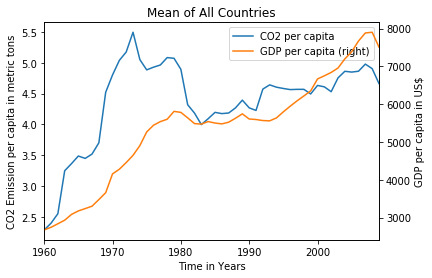

In [16]:
# plot CO2 emission and GDP for all HDI
time_data['CO2 per Capita'].plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
plt.xlabel('Time in Years')
time_data['GDP per Capita'].plot(secondary_y=True, label="GDP per capita", legend=True)
plt.ylabel('GDP per capita in US$')
plt.title('Mean of All Countries')

The data seems to indicate, that up to the 1970s, a big increase in CO2 emission was needed in order to achieve an increase in GDP. After that, this strong positive correlation seems to weaken. I will explore this relationship for economies with low, medium and high HDI in the following plots.

Text(0.5,1,u'Mean of Countries with a Low HDI')

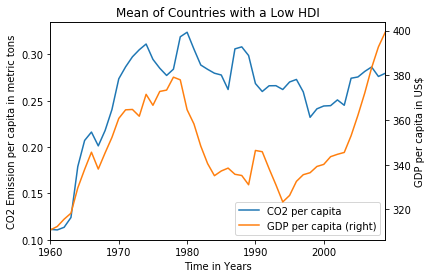

In [17]:
# plot CO2 emission and GDP for low HDI
time_data['CO2 per Capita - HDI Low'].plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
plt.xlabel('Time in Years')
time_data['GDP per Capita - HDI Low'].plot(secondary_y=True, label="GDP per capita", legend=True)
plt.ylabel('GDP per capita in US$')
plt.title('Mean of Countries with a Low HDI')

Again, for economies with a low HDI, there seems to be a strong positive correlation of CO2 emission and GDP until the 1970s. Starting around 1995, the data shows a strong increase in GDP without big increases in CO2 emission. fro these economies.

Text(0.5,1,u'Mean of Countries with a Medium HDI')

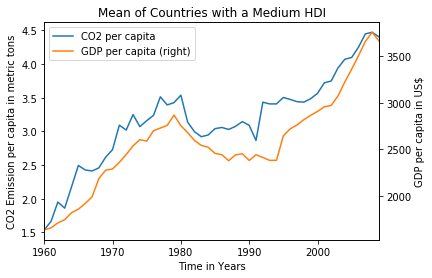

In [18]:
# plot CO2 emission and GDP for medium HDI
time_data['CO2 per Capita - HDI Medium'].plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
plt.xlabel('Time in Years')
time_data['GDP per Capita - HDI Medium'].plot(secondary_y=True, label="GDP per capita", legend=True)
plt.ylabel('GDP per capita in US$')
plt.title('Mean of Countries with a Medium HDI')

The plot above indicates a strong positive correlation between CO2 emission and GDP for medium HDI economies. I will explore this correlation later on.

Text(0.5,1,u'Mean of Countries with a High HDI')

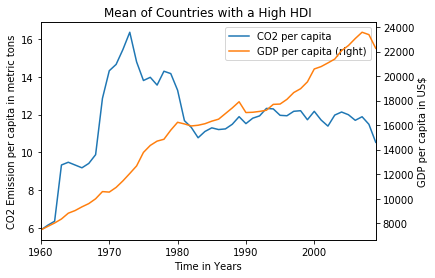

In [19]:
# plot CO2 emission and GDP for high HDI
time_data['CO2 per Capita - HDI High'].plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
plt.xlabel('Time in Years')
time_data['GDP per Capita - HDI High'].plot(secondary_y=True, label="GDP per capita", legend=True)
plt.ylabel('GDP per capita in US$')
plt.title('Mean of Countries with a High HDI')

The plot above indicates a strong correlation between CO2 emission and GDP for high HDI economies until approximately the 1970s. After that, this correlation weakens considerably. Like for low HDI economies, staring around 1995, the GDP of these economies increases without an increase in CO2 emission.

Text(0.5,1,u'United Kingdom')

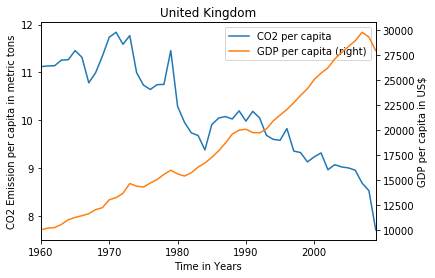

In [20]:
# plot CO2 emission and GDP for the United Kingdom
time_data['CO2 per Capita - United Kingdom'].plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
plt.xlabel('Time in Years')
time_data['GDP per Capita - United Kingdom'].plot(secondary_y=True, label="GDP per capita", legend=True)
plt.ylabel('GDP per capita in US$')
plt.title('United Kingdom')

The plot above indicates a negative correlation between CO2 emission and GDP for the United Kingdom

#### Conclusion
The data examined shows, that there is a strong correlation between CO2 emission per capita and GDP per capita for countries with a medium HDI. The correlation for these countries is positive, meaning that GDP and CO2 emissions both increase over time.

However, the plot for countries with a high HDI as well as the plot for of the CO2 emission per capita for the United Kingdom show, this positive correlation can not be shown. In fact, for the example of the United Kingdom, the correlation between the two is negative.

The correlation between these two variables will be explored further in the next chapter.

### Correlation Between CO2 Emission and GDP
In the following plots, the nature of the correlation between CO2 emission and GDP will be explored for low, medium and high HDI economies. Each data point is a year.

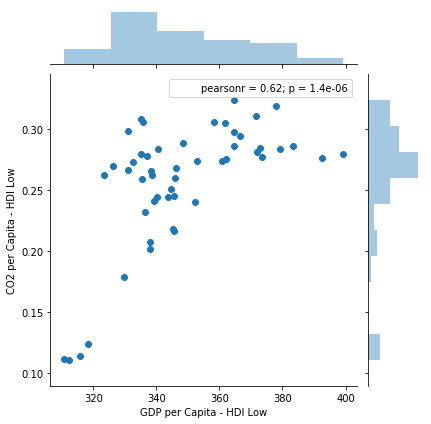

In [21]:
# plot countries with low hdi
sns.jointplot(x='GDP per Capita - HDI Low', y='CO2 per Capita - HDI Low', data=time_data)

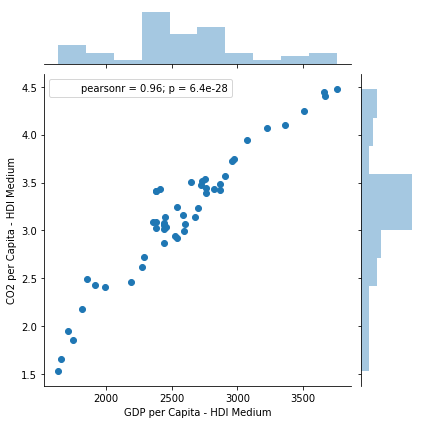

In [22]:
# plot countries with medium hdi
sns.jointplot(x='GDP per Capita - HDI Medium', y='CO2 per Capita - HDI Medium', data=time_data)

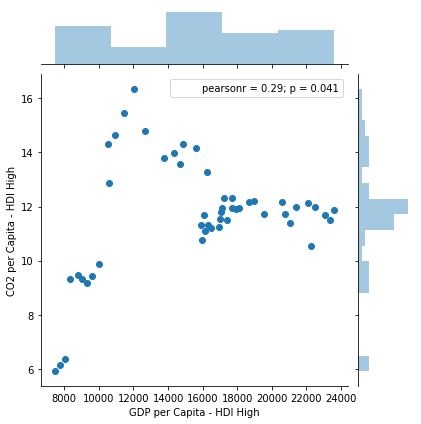

In [23]:
# regression plot countries with high hdi
sns.jointplot(x='GDP per Capita - HDI High', y='CO2 per Capita - HDI High', data=time_data)

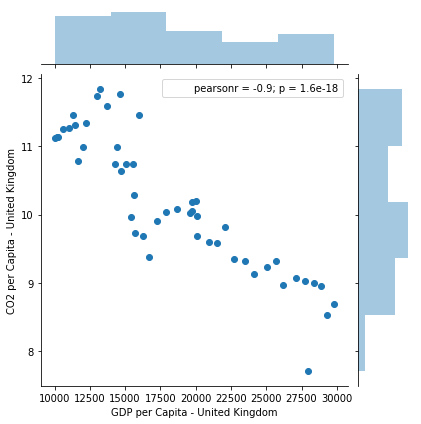

In [24]:
# regression plot United Kingdom
sns.jointplot(x='GDP per Capita - United Kingdom', y='CO2 per Capita - United Kingdom', data=time_data)

### CO2 Intensity per Country

The following plots will explore the CO2 intensity of an economy, defined as CO2 emission per capita divided by the GDP per capita for that country.

Text(0.5,1,u'Mean of Countries with low HDI')

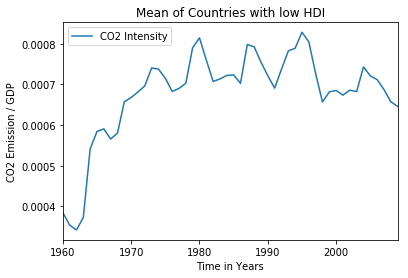

In [26]:
# plot CO2 Intensity for low HDI
time_data['CO2 Intensity - HDI Low'].plot(label="CO2 Intensity", legend=True)
plt.ylabel('CO2 Emission / GDP')
plt.xlabel('Time in Years')
plt.title('Mean of Countries with low HDI')

The plot above shows, that for low HDI economies, the CO2 intensity has increased from the 1960s until the 1980s, but has since then stayed at a low level.

Text(0.5,1,u'Mean of Countries with medium HDI')

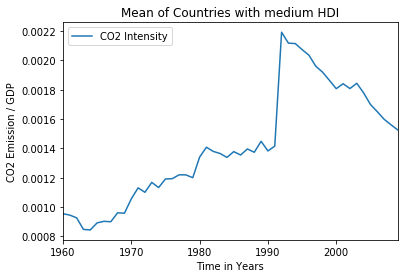

In [27]:
# plot CO2 Intensity for medium HDI
time_data['CO2 Intensity - HDI Medium'].plot(label="CO2 Intensity", legend=True)
plt.ylabel('CO2 Emission / GDP')
plt.xlabel('Time in Years')
plt.title('Mean of Countries with medium HDI')

The plot for medium HDI economies shows an increase in CO2 intensity until the beginning of the 1990s. After that the is an abrupt increase and a following decrease of CO2 intensity. This can be explained by the fact, that starting at the beginning of the 1990s after the break down of the Soviet Union, data becomes available for the countries that emerged from the Soviet Union. As the industries of these economies collapsed, CO2 intensity dropped.

Text(0.5,1,u'Mean of Countries with high HDI')

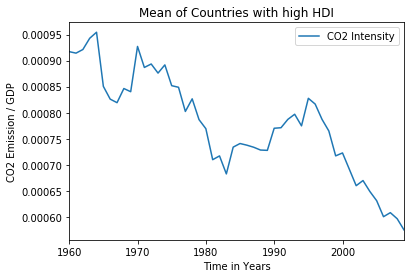

In [28]:
# plot CO2 Intensity for high HDI
time_data['CO2 Intensity - HDI High'].plot(label="CO2 Intensity", legend=True)
plt.ylabel('CO2 Emission / GDP')
plt.xlabel('Time in Years')
plt.title('Mean of Countries with high HDI')

The plot for high HDI economies shows, that there is a clear trend towards lower CO2 intensity.

Text(0.5,1,u'United Kingdom')

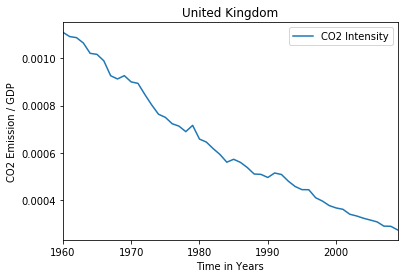

In [29]:
# plot CO2 Intensity for United Kingdom
time_data['CO2 Intensity - United Kingdom'].plot(label="CO2 Intensity", legend=True)
plt.ylabel('CO2 Emission / GDP')
plt.xlabel('Time in Years')
plt.title('United Kingdom')

The plot for the United Kingdowm is a perfect example how CO2 intensity has dropped consistently since the 1960s, due to the change from a pure industrial to a service driven economy.

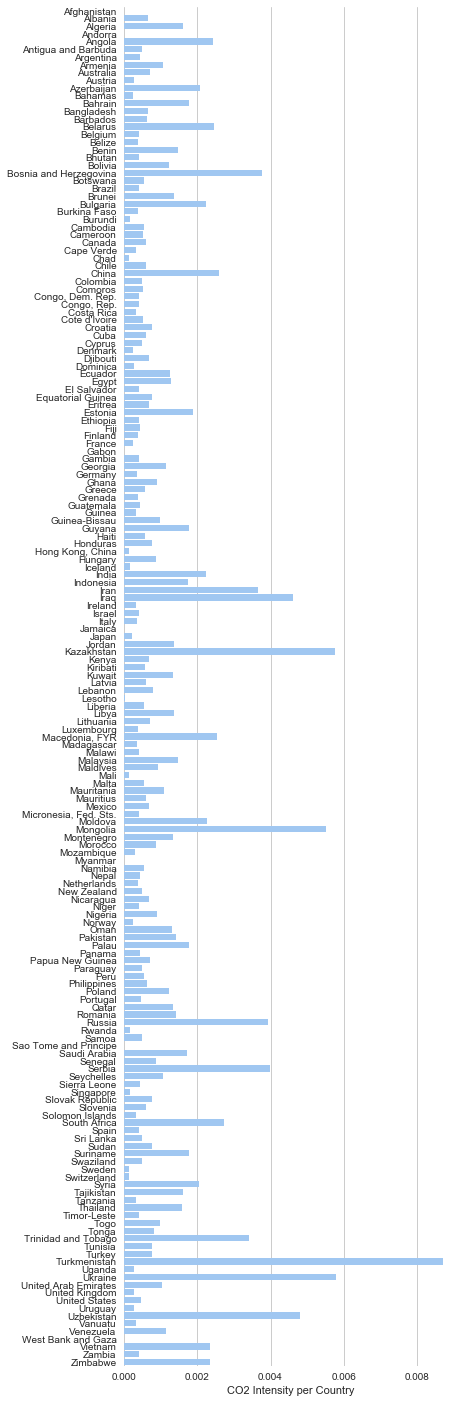

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 25))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x='CO2 Intensity', y=country_data.index, data=country_data, color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="CO2 Intensity per Country")
sns.despine(left=True, bottom=True)

The bar plot above shows, which countries have a higher or a lower CO2 intensive economy. Unsurprisingly, some countries of the Soviet Union are among the ones with the highest CO2 intensity. Some of them are big suppliers of fossil fuel like coal and gas. Among the countries with the highest CO2 intensity are also Iran and Iraq. The oil industries of these countries are the biggest contributor to CO2 emission. All of these countries belong to the group of medium HDI economies.

<a id='conclusions'></a>
## Conclusions

The findings of this report show, that indeed there are indications in the gapminder data set, that support the hypothesis stated by the Environmental Kuznets Curve (EKC).

Economies with a low Human Development Index (HDI) typically have a weak correlation between CO2 emission and GDP, which can also be seen in the CO2 intensity (CO2 emission per capita / GDP per capita), which has not increased over time since the 1970s for these countries. This supports the idea of the EKC, that in agriculturally dominated economies, an increase in GDP is not necessarily linked to an increase in CO2 emission.

For economies with a medium HDI, the correlation between CO2 emission and GDP is strong and the CO2 intensity has increased considerably between the 1960s and the beginning of the 1990s. This is exactly what was proposed by the EKC hypothesis and could indeed be due to the industrialization of these economies.

Countries with a high HDI, such as the United Kingdom, even show a negative correlation between CO2 emission per capita and GDP per capita in some cases. In general, the correlation between the two is weak and the CO2 intensity has dropped considerably since the middle of the 1990s. An explanation could be, that high HDI economies have developed from purely industrial economies to more service oriented economies. Another factor could be more regulation of the industry due to stronger environmental awareness of the administrations of these countries.

A shift CO2 emission from high HDI economies towards lower HDI economies, as suspected by some critics of the EKC, could not be determined from ther gapminder data. The rate of change of CO2 emission per capita has not significantly changed for low and medium HDI countries since the start of the drop of CO2 intensity in high HDI countries.